In [1]:
#DBSCAN
import pyspark
from pyspark.sql import SparkSession

spark=SparkSession.builder.appName('testmodel').getOrCreate()

df=spark.read.csv('./data.csv',inferSchema=True,header=True)
df.show(10)

+------------+-----------+-----------+
|Sepal Length|Sepal Width|    Species|
+------------+-----------+-----------+
|         5.3|        3.7|     Setosa|
|         5.1|        3.8|     Setosa|
|         7.2|        3.0|  Virginica|
|         5.4|        3.4|     Setosa|
|         5.1|        3.3|     Setosa|
|         5.4|        3.9|     Setosa|
|         7.4|        2.8|  Virginica|
|         6.1|        2.8|Verscicolor|
|         7.3|        2.9|  Virginica|
|         6.0|        2.7|Verscicolor|
+------------+-----------+-----------+
only showing top 10 rows



In [2]:
df.printSchema()

root
 |-- Sepal Length: double (nullable = true)
 |-- Sepal Width: double (nullable = true)
 |-- Species: string (nullable = true)



In [2]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

assembler=VectorAssembler(inputCols=['Sepal Length','Sepal Width'],outputCol='features')
output=assembler.transform(df)
output.select('features').show(5)

+---------+
| features|
+---------+
|[5.3,3.7]|
|[5.1,3.8]|
|[7.2,3.0]|
|[5.4,3.4]|
|[5.1,3.3]|
+---------+
only showing top 5 rows



In [3]:
final_data=output.select('features','Species')
train_data,test_data=final_data.randomSplit([0.7,0.3])
train_data.describe().show()

+-------+---------+
|summary|  Species|
+-------+---------+
|  count|       10|
|   mean|     NULL|
| stddev|     NULL|
|    min|   Setosa|
|    max|Virginica|
+-------+---------+



In [4]:
import numpy as np
np.array(final_data.select('features'))

array(DataFrame[features: vector], dtype=object)

In [5]:
pandas_df = final_data.toPandas() 
pandas_df.head()

,features,Species
0,"[5.3, 3.7]",Setosa
1,"[5.1, 3.8]",Setosa
2,"[7.2, 3.0]",Virginica
3,"[5.4, 3.4]",Setosa
4,"[5.1, 3.3]",Setosa


In [7]:
from sklearn.cluster import DBSCAN,KMeans
#dbscan = DBSCAN(eps=0.6, min_samples=3)
#dbscan_labels = dbscan.fit_predict(pandas_df['features'].tolist())
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_labels=kmeans.fit_predict(pandas_df['features'].tolist())
#print(dbscan_labels)
print(kmeans_labels)

[2 2 0 2 2 2 0 1 0 1 1 1 1 1 1]


In [8]:
X=output.select('Sepal Length').toPandas()
Y=output.select('Sepal Width').toPandas()
np.array(X)


array([[5.3],
       [5.1],
       [7.2],
       [5.4],
       [5.1],
       [5.4],
       [7.4],
       [6.1],
       [7.3],
       [6. ],
       [5.8],
       [6.3],
       [5.1],
       [6.3],
       [5.5]])

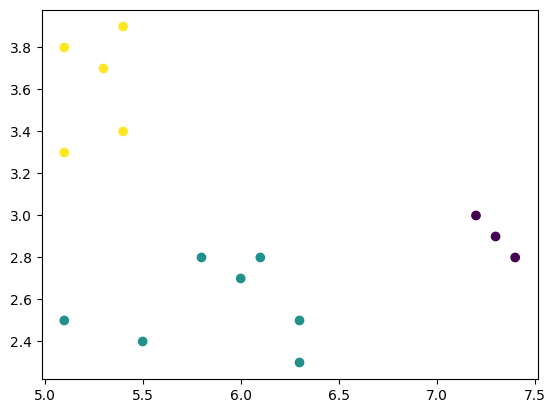

In [10]:
import matplotlib.pyplot as plt

plt.scatter(np.array(X),np.array(Y),c=kmeans_labels)
plt.show()

In [ ]:
spark.stop()